# **0.0 Import**

In [ ]:
#conda --version

In [ ]:
## Observação: estava dando erro depois que atualizei o conda version - o problema era a versão do pillow coloquei 9.3.0 e funcionou

#import PIL
#print(PIL.__version__)


In [ ]:
#!pip install scipy

In [1]:
import PIL
import warnings
import inflection

import pandas              as pd
import numpy               as np

import seaborn             as sns
from matplotlib                     import pyplot             as plt

from tabulate                       import tabulate
from IPython.core.display           import HTML
from IPython.display                import Image

## **0.1 Helper Functions**

In [2]:
#Configuração gerais
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()


# Transforma colunas em snakecase
def convert_to_snake_case(df):
    cols_old = df.columns.tolist()
    snakecase = lambda x: inflection.underscore(x)
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df


#Estatística descritiva - medidas central.
def descriptive_statistics(df1_num):
    
    # Central Tendency - mean, meadina
    ct1= pd.DataFrame(df1_num.apply(np.mean)).T
    ct2= pd.DataFrame(df1_num.apply(np.median)).T

    # dispersion - std, min, max, range, skew, kurtosis
    ct3= pd.DataFrame(df1_num.apply(np.std)).T
    ct4= pd.DataFrame(df1_num.apply(min)).T
    ct5= pd.DataFrame(df1_num.apply(max)).T
    ct6= pd.DataFrame(df1_num.apply(lambda x: x.max() - x.min())).T
    ct7= pd.DataFrame(df1_num.apply(lambda x: x.skew())).T
    ct8= pd.DataFrame(df1_num.apply(lambda x: x.kurtosis())).T
    #ct9 = pd.DataFrame(df1_num.apply(lambda x: 'not normal' if shapiro(x.sample(5000))[1] < 0.05 else 'normal')).T

    # concatenar
    df_statistics= pd.concat([ct4, ct5, ct6, ct1, ct2,ct3, ct7, ct8]).T
    df_statistics.columns=['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    df_statistics.round(2)

    return df_statistics


#Gráfico de correlação 
def plot_corr(col):
    a = correlation[col].sort_values(ascending=False).to_frame()
    a.columns = ['']
    a.drop(col, axis=0, inplace=True)
    plot = sns.heatmap( a, annot=True, cmap="Blue").set_title(col);
    
    return plot


#Correlação variáveis categóricas
def cramer_v(x, y):
    # cramer V function to calculate correlation btw categorical variables
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = chi2_contingency(cm)[0]
    
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))


warnings.filterwarnings ("ignore")


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## **0.2 Loading Data**

In [3]:
df_raw_A24 = pd.read_csv("Data/airbnb_01_2024-12_2024.csv", low_memory = False)
df_raw_A23 = pd.read_csv("Data/airbnb_01_2023-12_2023.csv",low_memory = False)
df_raw_A22 = pd.read_csv("Data/airbnb_07_2022-12_2022.csv",low_memory = False)

In [4]:
# Listar as colunas de cada DataFrame
colunas_A24 = set(df_raw_A24.columns)
colunas_A23 = set(df_raw_A23.columns)
colunas_A22 = set(df_raw_A22.columns)

# Identificar todas as colunas únicas (que existem em pelo menos um DataFrame)
todas_colunas = colunas_A24 | colunas_A23 | colunas_A22

# Identificar colunas comuns a todos os DataFrames
comuns = colunas_A24 & colunas_A23 & colunas_A22

# Identificar colunas diferentes (que não são comuns)
diferentes = todas_colunas - comuns

# Mostrar as colunas diferentes
print("Colunas diferentes entre os DataFrames:", diferentes)


Colunas diferentes entre os DataFrames: {'Taxa de serviço', 'Taxa de serviço do anfitrião'}


In [5]:
df_raw_A23.rename(columns={'Taxa de serviço do anfitrião': 'Taxa de serviço'}, inplace=True)
df_raw_A22.rename(columns={'Taxa de serviço do anfitrião': 'Taxa de serviço'}, inplace=True)

In [6]:
#verificando se alterou o nome da coluna
df_raw_A22.columns

Index(['Data', 'Disponível por data', 'Tipo', 'Código de Confirmação',
       'Data da reserva', 'Data de início', 'Data de término', 'Noites',
       'Hóspede', 'Anúncio', 'Detalhes', 'Código de referência', 'Moeda',
       'Valor', 'Pago', 'Taxa de serviço', 'Taxa de pagamento rápido',
       'Taxa de limpeza', 'Ganhos brutos', 'Impostos de ocupação',
       'Ganhos do ano'],
      dtype='object')

In [7]:
df_raw = pd.concat([df_raw_A22, df_raw_A23, df_raw_A24], ignore_index=True)

# **1.0 Data Description**

In [8]:
df1 = df_raw.copy()

## **1.1 Rename Columns**

In [9]:
df1.columns

Index(['Data', 'Disponível por data', 'Tipo', 'Código de Confirmação',
       'Data da reserva', 'Data de início', 'Data de término', 'Noites',
       'Hóspede', 'Anúncio', 'Detalhes', 'Código de referência', 'Moeda',
       'Valor', 'Pago', 'Taxa de serviço', 'Taxa de pagamento rápido',
       'Taxa de limpeza', 'Ganhos brutos', 'Impostos de ocupação',
       'Ganhos do ano'],
      dtype='object')

In [10]:
df1 = convert_to_snake_case(df1)

## **1.2 Data Dimensions**

In [11]:
print("Numero de linhas:{}".format(df1.shape[0]))
print("Numero de colunas:{}".format(df1.shape[1]))

Numero de linhas:184
Numero de colunas:21


## **1.3 Data Types**

In [12]:
df1.dtypes

data                         object
disponível por data          object
tipo                         object
código de confirmação        object
data da reserva              object
data de início               object
data de término              object
noites                      float64
hóspede                      object
anúncio                      object
detalhes                     object
código de referência         object
moeda                        object
valor                       float64
pago                        float64
taxa de serviço             float64
taxa de pagamento rápido    float64
taxa de limpeza             float64
ganhos brutos               float64
impostos de ocupação        float64
ganhos do ano               float64
dtype: object

## **1.4 Check NA**

In [13]:
round((df1.isna().sum()/len(df1))*100, 2)

data                          0.00
disponível por data          50.54
tipo                          0.00
código de confirmação        49.46
data da reserva              53.80
data de início               50.54
data de término              51.09
noites                       51.09
hóspede                      51.09
anúncio                      51.09
detalhes                     46.20
código de referência         50.54
moeda                         0.00
valor                        49.46
pago                         50.54
taxa de serviço              53.80
taxa de pagamento rápido    100.00
taxa de limpeza              53.80
ganhos brutos                49.46
impostos de ocupação         53.80
ganhos do ano                49.46
dtype: float64

## **1.5 Fillout NA**

## **1.6 Change Types**

In [86]:
df1.head()

In [ ]:
#data
#df1['data'] = pd.to_datetime(df1['data'], errors='coerce')


In [15]:
# Converter as colunas para datetime, ignorando erros em valores NaN
for col in ['data','disponível por data', 'data da reserva', 'data de início', 'data de término', 'ganhos do ano']:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')
    

In [ ]:
# Converte tipos para integer e float
#df1['noites'] = pd.to_numeric(df1['noites'], errors='coerce').astype('Int64')


In [16]:
df1.dtypes

data                        datetime64[ns]
disponível por data         datetime64[ns]
tipo                                object
código de confirmação               object
data da reserva             datetime64[ns]
data de início              datetime64[ns]
data de término             datetime64[ns]
noites                             float64
hóspede                             object
anúncio                             object
detalhes                            object
código de referência                object
moeda                               object
valor                              float64
pago                               float64
taxa de serviço                    float64
taxa de pagamento rápido           float64
taxa de limpeza                    float64
ganhos brutos                      float64
impostos de ocupação               float64
ganhos do ano               datetime64[ns]
dtype: object

In [ ]:
#def convert_date_format(df, columns):
#    for column in columns:
#        df[column] = pd.to_datetime(df[column])
#        df[column] = df[column].dt.strftime('%d/%m/%Y')

In [ ]:
# Especificar as colunas que precisam ser convertidas
#date_columns = ['data', 'disponível por data', 'data da reserva', 'data de início', 'data de término']
#convert_date_format(df1, date_columns)

In [ ]:
#de onde veio a função

##data
#df1_A22['data'] = pd.to_datetime(df1_A22['data'])
## Convertendo para o formato de data do Brasil (DD/MM/YYYY)
#df1_A22['data'] = df1_A22['data'].dt.strftime('%d/%m/%Y')


## **1.7 Descriptive Statistical**

In [17]:
df1_num=df1.select_dtypes(include=['int64', 'float64'])
df1_cat=df1.select_dtypes(exclude=['int64', 'float64', 'datetime'])

### **1.7.1 Numerical Attributes**

In [18]:
df1_num.describe()

,noites,valor,pago,taxa de serviço,taxa de pagamento rápido,taxa de limpeza,ganhos brutos,impostos de ocupação
count,90.000000,93.000000,91.000000,85.000000,0.0,85.000000,93.000000,85.0
mean,9.477778,1155.745484,1181.146484,38.238235,NaN,129.882353,1190.694409,0.0
std,16.656630,1048.182849,1044.094929,32.465200,NaN,48.216778,1080.502826,0.0
min,2.000000,-300.000000,58.750000,8.100000,NaN,0.000000,-300.000000,0.0
25%,3.000000,558.200000,561.595000,18.840000,NaN,125.000000,575.480000,0.0
50%,4.000000,833.430000,854.750000,26.940000,NaN,150.000000,859.230000,0.0
75%,7.750000,1444.060000,1447.890000,44.940000,NaN,150.000000,1488.760000,0.0
max,89.000000,5378.530000,5378.530000,166.500000,NaN,170.000000,5545.030000,0.0


In [19]:
#descriptive_statistics(df1_num)


,min,max,range,mean,median,std,skew,kurtosis
noites,NaN,NaN,87.00,9.477778,NaN,16.563835,3.889962,15.906845
valor,NaN,NaN,5678.53,1155.745484,NaN,1042.532227,2.255769,5.764158
pago,58.75,5378.53,5319.78,1181.146484,NaN,1038.342296,2.298252,5.823964
taxa de serviço,NaN,NaN,158.40,38.238235,NaN,32.273664,2.338761,5.775075
taxa de pagamento rápido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taxa de limpeza,NaN,NaN,170.00,129.882353,NaN,47.932311,-1.897899,2.375340
ganhos brutos,NaN,NaN,5845.03,1190.694409,NaN,1074.677971,2.258522,5.775872
impostos de ocupação,NaN,NaN,0.00,0.000000,NaN,0.000000,0.000000,0.000000


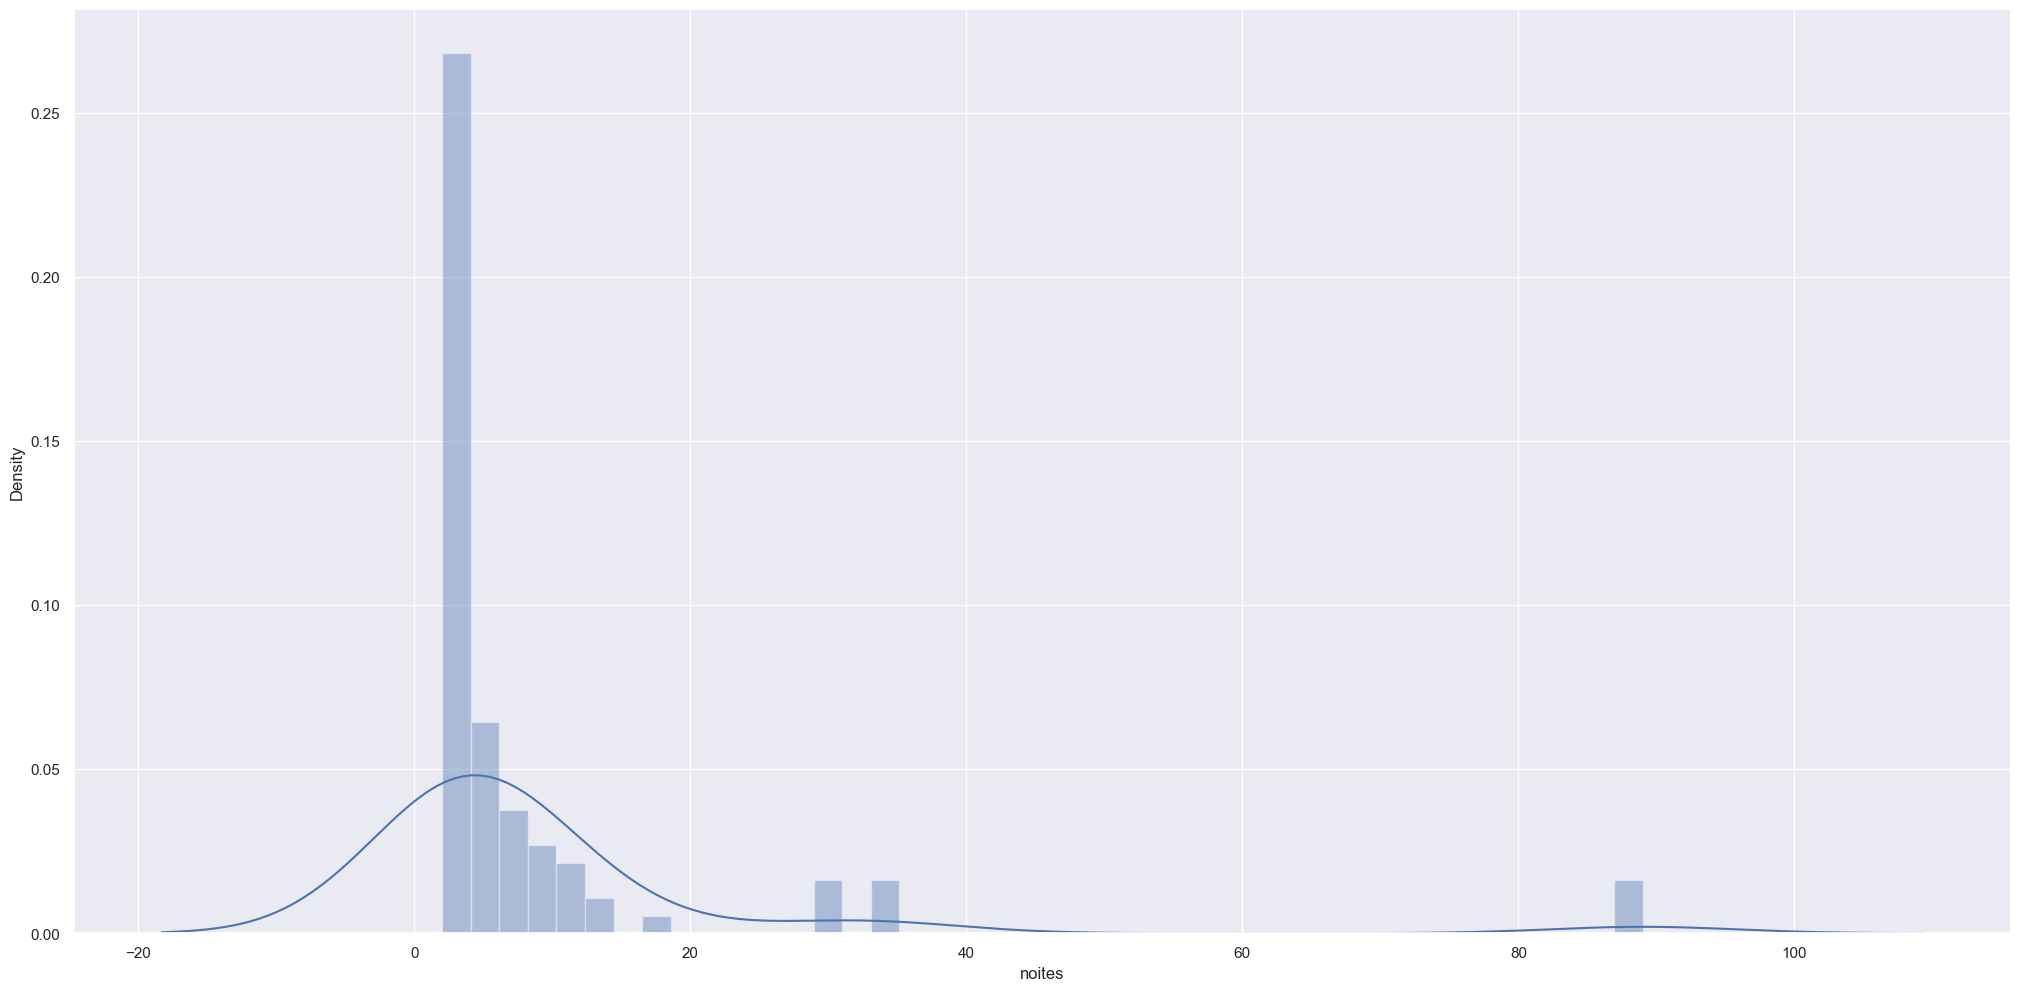

In [20]:
#Distribuição das diarias
sns.distplot(df1["noites"]);


### **1.7.2 Categorical Attributes**

In [ ]:
#não aplica

# **2.0 Feature Engineering**

In [43]:
df2 = df1.copy()

## **2.1 Mind Map Hypotesis**

## **2.2 Hypotesis**

### **2.2.1 Hipóteses Padrões de Reserva**

1. Existe um aumento no número de reservas em meses específicos do ano (alta temporada)?
2. A maioria das reservas é feita com quantos dias de antecedência?
3. Datas como feriados nacionais ou eventos internacionais costumam estar reservadas?
4. Qual é a porcentagem de reservas com menos de 3 noites em relação às que excedem 7 noites?
5. Reservas podem ser agrupadas em segmentos de valor (baixo, médio, alto), e esses grupos apresentam comportamentos distintos?
6. Tem meses com tendência a ter mais reservas?

### **2.2.2 Hipóteses Valor e Preço**

1. Estadas mais longas têm um valor médio por noite mais baixo?
2. Existe uma variação clara de preços dependendo do mês?
3. Reservas realizadas durante feriados ou eventos locais apresentam um aumento significativo no valor médio por noite?
4. Qual a porcentagem do valor médio por noite para hóspedagens em grupos em relação a hospedagens individuais?
5. Preços ajustados com base na demanda de hóspedes, resultam em maior receita mensal?
6. Qual o valor padrão das reservas? E quais os valores dispcrepantes?

### **2.2.3 Hipóteses Perfil do Hóspede**

1. Se disponível, hóspedes de determinadas regiões tendem a fazer reservas de maior valor?
2. A distribuição percentual de hóspedes por região segue padrões consistentes ao longo do tempo, com certas localidades dominando a maior parte das reservas?

### **2.2.4 Hipóteses Desempenho Financeiro**

1. Existem variações significativas de ganho mensal, e como elas se relacionam com o número de reservas?
2. Qual é o impacto das taxas de serviço e impostos na receita líquida por reserva?
3. O custo médio da taxa de limpeza impacta mais negativamente reservas de curta duração?
4. Quais meses oferecem maior margem de lucro considerando receitas e custos?
5. Reservas feitas com preços ajustados dinamicamente aumentam a margem de lucro?
6. A receita total cresce consistentemente mês a mês ou ano a ano?
7. Qual é o ROI de melhorias realizadas no imóvel ou de investimentos em marketing?

## **2.3 Hypotheses Final List**

## **2.4 Feature Engineering**

In [44]:
# Variáveis a ser derivadas da variavel original Date 
# year 
df2["ano"] = df2["data"].dt.year

#df2["ganhos do ano"] = df2["ganhos do ano"].dt.year


# month
df2["mes"] = df2["data"].dt.month

# day
df2["dia"] = df2["data"].dt.day

# week of year
df2["semana_do_ano"] = df2["data"].dt.isocalendar().week

# year week (%Y ano, %W semana)
df2["ano_semana"] = df2["data"].dt.strftime("%Y-%W")

In [45]:
df2 = df2.drop(columns=['anúncio', 'taxa de serviço', 'código de referência', 'detalhes', 'ganhos do ano'])

In [46]:
# Reorganiza as colunas para que 'ano' e 'mes' fiquem ao lado de 'data'
colunas = ['data', 'ano', 'mes', 'dia', 'semana_do_ano', 'ano_semana'] + [col for col in df2.columns if col not in ['data', 'ano', 'mes', 'dia', 'semana_do_ano', 'ano_semana']]
df2 = df2[colunas]

In [47]:
#nova coluna Valor liquido

# Calcular o valor líquido apenas para linhas onde o tipo é "Reserva"
df2.loc[df2['tipo'] == 'Reserva', 'valor_liquido'] = df2['valor'] - df2['taxa de limpeza']

#Calcular o valor da diária apenas para linhas onde o tipo é "Reserva"
df2.loc[df2['tipo'] == 'Reserva', 'valor_diaria'] = df2['valor_liquido'] / df2['noites']

In [53]:
df2['valor_diaria'] = df2['valor_diaria'].round(2)


In [85]:
df2[df2['ano'] == 2024].head(10)

### **Compreendendo Algumas Possibilidades**

In [87]:
valores_unicos = df2['pago'].dropna().unique()
print(valores_unicos)


[3286.69 3521.45 3638.83 1124.16  261.66  792.    484.55  531.22 1541.47
  513.63 1705.62 1525.37  693.88  868.32  870.26 2679.57  703.57  958.44
  711.32 2336.51  752.02  664.81 5331.02   85.01 2559.38 2753.22  947.78
 1451.72  726.83  649.3   629.92  872.19  508.78  590.18  494.24 1819.98
  558.2  1211.38  687.09 1521.49  833.43  920.65  564.99   96.36  648.33
  971.04  537.85 1569.95  523.32  571.77  180.02  930.34  997.21  941.97
   58.75  476.    288.09 1393.57 1502.11  719.97  424.47  854.75  540.76
 1584.33  647.36 1726.31 1805.18  632.35  301.   4742.61 5378.53 1112.66
 2940.26 1240.45  608.6  1541.84 1444.06 1402.29 1360.62  684.19  529.13
  661.9   385.7  1383.59 1103.23  511.69  505.87  705.5 ]


In [88]:
df2['pago'].mean()

1181.1464835164836

In [89]:
# Contar frequências de cada número
ranking = df2['noites'].value_counts().sort_index()

# Exibir o ranking como inteiros
print("Frequência de Ocorrências por Número de Noites:")
for numero, frequencia in ranking.items():
    print(f"{int(numero)} noites: {int(frequencia)} ocorrência(s)")

Frequência de Ocorrências por Número de Noites:
2 noites: 22 ocorrência(s)
3 noites: 17 ocorrência(s)
4 noites: 11 ocorrência(s)
5 noites: 6 ocorrência(s)
6 noites: 6 ocorrência(s)
7 noites: 5 ocorrência(s)
8 noites: 2 ocorrência(s)
9 noites: 3 ocorrência(s)
10 noites: 2 ocorrência(s)
11 noites: 2 ocorrência(s)
12 noites: 2 ocorrência(s)
13 noites: 1 ocorrência(s)
14 noites: 1 ocorrência(s)
17 noites: 1 ocorrência(s)
29 noites: 1 ocorrência(s)
31 noites: 2 ocorrência(s)
34 noites: 3 ocorrência(s)
89 noites: 3 ocorrência(s)


In [90]:
# Filtra as linhas onde o ano é 2023
df_2023 = df2[df2['ano'] == 2023]

# Soma o valor da coluna 'pago' para cada mês em 2023
receita_mensal_2023 = df_2023.groupby(['ano', 'mes'])['pago'].sum().reset_index()

# Ordena o DataFrame por mês
receita_mensal_2023 = receita_mensal_2023.sort_values(by='mes').reset_index(drop=True)

# Calcula a média das receitas mensais em 2023
media_receita_mensal_2023 = receita_mensal_2023['pago'].mean()

print("Receita mensal somada por mês em 2023:")
print(receita_mensal_2023)
print("\nMédia da receita mensal em 2023:", media_receita_mensal_2023)


Receita mensal somada por mês em 2023:
     ano  mes     pago
0   2023    1  2845.06
1   2023    2   537.85
2   2023    3  2280.72
3   2023    4  4520.86
4   2023    5  3589.56
5   2023    6  3095.31
6   2023    7  2323.91
7   2023    8  7712.10
8   2023    9  5416.03
9   2023   10  3753.34
10  2023   11  5052.90
11  2023   12  6177.08

Média da receita mensal em 2023: 3942.060000000001


In [91]:
# Filtra as linhas onde o ano é 2024
df_2024 = df2[df2['ano'] == 2024]

# Soma o valor da coluna 'pago' para cada mês em 20234
receita_mensal_2024 = df_2024.groupby(['ano', 'mes'])['pago'].sum().reset_index()

# Ordena o DataFrame por mês
receita_mensal_2024 = receita_mensal_2024.sort_values(by='mes').reset_index(drop=True)

# média das receitas mensais em 2024
media_receita_mensal_2024 = receita_mensal_2024['pago'].mean()

print("Receita mensal somada por mês em 2024:")
print(receita_mensal_2024)
print("\nMédia da receita mensal em 2024:", media_receita_mensal_2024)


Receita mensal somada por mês em 2024:
     ano  mes     pago
0   2024    1  1211.37
1   2024    2  2998.51
2   2024    3  4551.88
3   2024    4  6237.24
4   2024    5  9431.45
5   2024    6  5043.61
6   2024    7   632.35
7   2024    8  3531.49
8   2024    9  4051.67
9   2024   10  4438.49
10  2024   11  2869.52

Média da receita mensal em 2024: 4090.6890909090903


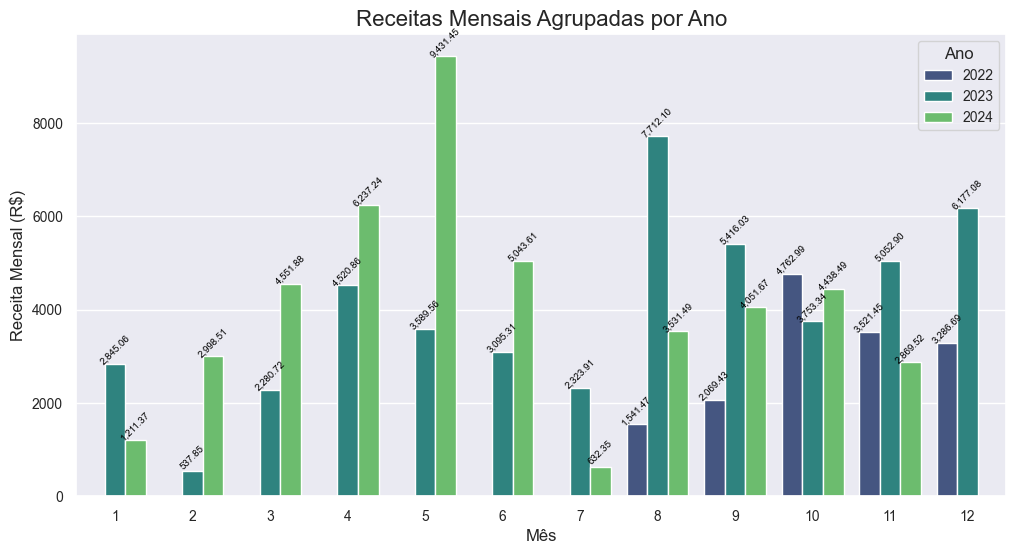

In [92]:
receita_ano_mes = df2.groupby(['ano', 'mes'])['pago'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=receita_ano_mes, x='mes', y='pago', hue='ano', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=7, color='black', 
                xytext=(0, 10), textcoords='offset points',
               rotation=45)

plt.title('Receitas Mensais Agrupadas por Ano', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Receita Mensal (R$)', fontsize=12)
plt.legend(title='Ano', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [93]:
#teve valor na coluna pago referente a coluna tipo ao atributo Payout diferente valor da coluna valor na coluna tipo atributo reserva?

df_payout = df2[df2['tipo'] == 'Payout']
df_reserva = df2[df2['tipo'] == 'Reserva']

df_comparado = pd.merge(df_reserva[['código de confirmação', 'valor']], 
                        df_payout[['código de confirmação', 'pago']], 
                        on='código de confirmação', 
                        how='inner')

df_comparado['diferente'] = df_comparado['valor'] != df_comparado['pago']

linhas_diferentes = df_comparado[df_comparado['diferente']]

print(linhas_diferentes)


Empty DataFrame
Columns: [código de confirmação, valor, pago, diferente]
Index: []


In [84]:
df2.columns

Index(['data', 'ano', 'mes', 'dia', 'semana_do_ano', 'ano_semana',
       'disponível por data', 'tipo', 'código de confirmação',
       'data da reserva', 'data de início', 'data de término', 'noites',
       'hóspede', 'moeda', 'valor', 'pago', 'taxa de pagamento rápido',
       'taxa de limpeza', 'ganhos brutos', 'impostos de ocupação',
       'valor_liquido', 'valor_diaria'],
      dtype='object')

# **3.0 DATA FILTERING**

In [ ]:
df3 = df2.copy()

## **3.1 Row filtering**

## **3.2 Column selection**

# **4.0 EDA**

## **4.1 Analise Univariada**

### **4.1.2 Numerical variable**

### **4.1.2 Numerical variable**

## **4.2 Analise Bivariada**

H1-

## **4.3 Analise Multivariada**

### **4.3.1 Numerical Attributes**

### **4.3.2 Categorical Attributes**